# Homework 2a

1. Plot the normal distribution fit (Gaussian) and histograms of `data1.dat`, `data2.dat` and `data3.dat`. 
   Which of the datasets are normal distributed?
2.	Determine whether `data1` and `data2` are drawn from a normal distribution with some unknown mean and unit variance using a Chi-Square test. Also determine if `data3` is drawn from a normal distribution with some unknown mean and a standard deviation of 4 using the Chi-Square test. Make your conclusions at a stated confidence level.



Homework 2A
Data1: Mean: 4.8551, Variance: 0.6502
Data2: Mean: 5.1315, Variance: 1.4267
Data3: Mean: 99.4003, Variance: 18.4311

Data1: Chi2-statistic: 65.0227, Cumulative probability: 0.0033, p-value: 0.9967
Data2: Chi2-statistic: 142.6713, Cumulative probability: 0.9973, p-value: 0.0027
Data3: Chi2-statistic: 57.5973, Cumulative probability: 0.8129, p-value: 0.1871


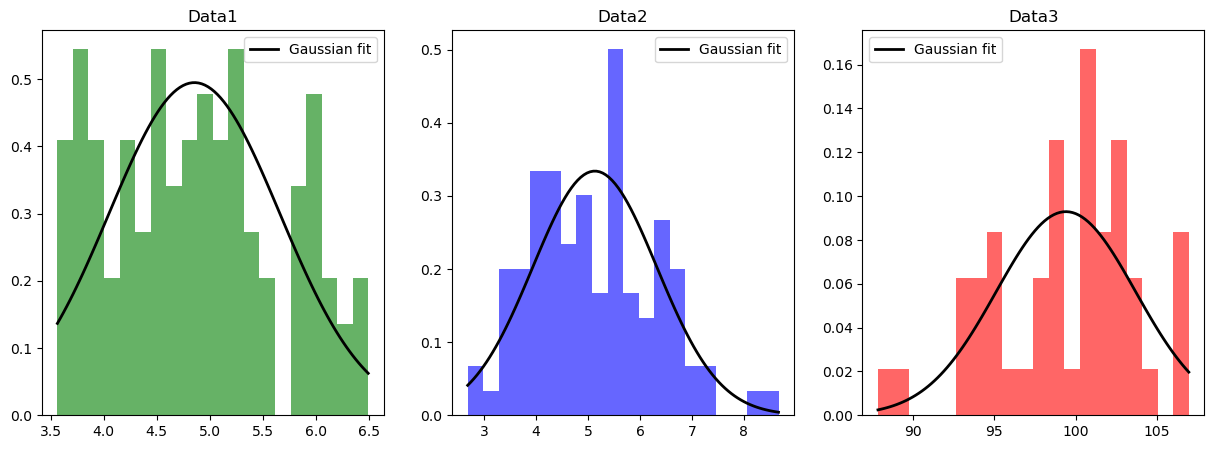

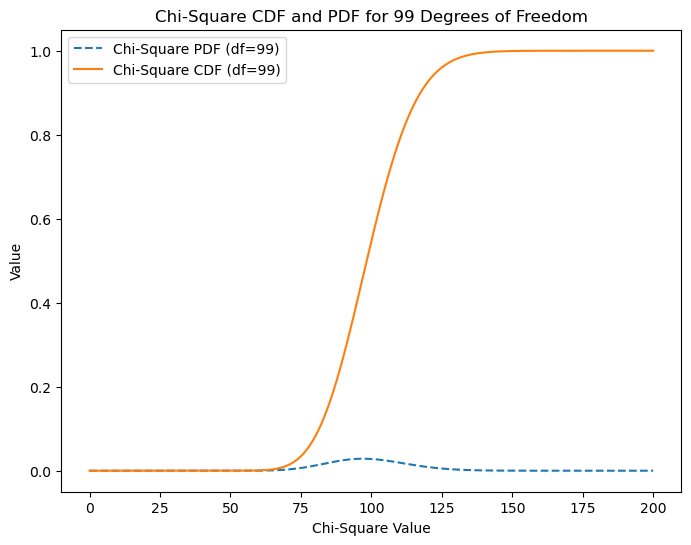

In [1]:
from math import pi
import numpy as np
import numpy.linalg as la
from matplotlib import pyplot as plt  # general plotting 
from matplotlib import cm 
from scipy.stats import chisquare, chi2

print("Homework 2A")

data1 = np.genfromtxt("../HW2_data/data1.dat")
data2 = np.genfromtxt("../HW2_data/data2.dat")
data3 = np.genfromtxt("../HW2_data/data3.dat")

# Calculate mean and variance for each dataset
mean1, var1 = np.mean(data1), np.var(data1)
mean2, var2 = np.mean(data2), np.var(data2)
mean3, var3 = np.mean(data3), np.var(data3)

print(f"Data1: Mean: {mean1:.4f}, Variance: {var1:.4f}")
print(f"Data2: Mean: {mean2:.4f}, Variance: {var2:.4f}")
print(f"Data3: Mean: {mean3:.4f}, Variance: {var3:.4f}")

res1=data1-mean1
res2=data2-mean2
res3=data3-mean3

# For unit variance (except for data3 where the variance is specified)
sum_res1 = res1 @ res1
sum_res2 = res2 @ res2
sum_res3 = res3 @ res3/4**2

# #  using the actual variance of the data
# sum_res1 = res1 @ res1/var1**2
# sum_res2 = res2 @ res2/var2**2

cdf1 = chi2.cdf(sum_res1, len(res1)-1)
cdf2 = chi2.cdf(sum_res2, len(res2)-1)
cdf3 = chi2.cdf(sum_res3, len(res3)-1)

pvalue1 = 1 - cdf1
pvalue2 = 1 - cdf2
pvalue3 = 1 - cdf3

print()
print(f"Data1: Chi2-statistic: {sum_res1:.4f}, Cumulative probability: {cdf1:.4f}, p-value: {pvalue1:.4f}")
print(f"Data2: Chi2-statistic: {sum_res2:.4f}, Cumulative probability: {cdf2:.4f}, p-value: {pvalue2:.4f}")
print(f"Data3: Chi2-statistic: {sum_res3:.4f}, Cumulative probability: {cdf3:.4f}, p-value: {pvalue3:.4f}")

# Create a row of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot histograms for each dataset
axs[0].hist(data1, bins=20, density=True, alpha=0.6, color='g')
axs[0].set_title('Data1')

axs[1].hist(data2, bins=20, density=True, alpha=0.6, color='b')
axs[1].set_title('Data2')

axs[2].hist(data3, bins=20, density=True, alpha=0.6, color='r')
axs[2].set_title('Data3')

# Plot Gaussian fits
x1 = np.linspace(min(data1), max(data1), 100)
p1 = np.exp(-((x1 - mean1)**2 / (2 * var1))) / np.sqrt(2 * pi * var1)
axs[0].plot(x1, p1, 'k', linewidth=2, label='Gaussian fit')

x2 = np.linspace(min(data2), max(data2), 100)
p2 = np.exp(-((x2 - mean2)**2 / (2 * var2))) / np.sqrt(2 * pi * var2)
axs[1].plot(x2, p2, 'k', linewidth=2, label='Gaussian fit')

x3 = np.linspace(min(data3), max(data3), 100)
p3 = np.exp(-((x3 - mean3)**2 / (2 * var3))) / np.sqrt(2 * pi * var3)
axs[2].plot(x3, p3, 'k', linewidth=2, label='Gaussian fit')

for ax in axs:
    ax.legend()

plt.show()

# Plot the chi-square CDF and PDF for 99 degrees of freedom
x = np.linspace(0, 200, 1000)
chi2_pdf = chi2.pdf(x, df=99)
chi2_cdf = chi2.cdf(x, df=99)

plt.figure(figsize=(8, 6))
plt.plot(x, chi2_pdf, label='Chi-Square PDF (df=99)', linestyle='--')
plt.plot(x, chi2_cdf, label='Chi-Square CDF (df=99)')

plt.title('Chi-Square CDF and PDF for 99 Degrees of Freedom')
plt.xlabel('Chi-Square Value')
plt.ylabel('Value')
plt.legend()
plt.show()
# plt.show()

### I am not certain how to solve this problem.
#### Here version 1 

The p-value is a probability for the rejection of the Null hypothesis. The Null hypothesis is: "The observations are significantly different from the expections". In our case the expectation is Gaussian distributed data. The Null hypothesis is therefore "The observations are NOT drawn from a Gaussian".  If we can reject the hypothesis, this mean that the data could have been drawn from a Gaussian.

A p-value < 0.05 means that the probability of observing a chi-square statistic as extreme (or more extreme) as observed is less than 5% (if the null hypothesis were true). We thus reject the null hypothesis with 95% confidence. In other words, we are 95% confident that the data are not Gaussian. 

### Results:
1. Using  the estimated variance of data1 and data2 (different than requested) we find:
```
Data1: Chi2-statistic: 153.7923, Cumulative probability: 0.9997, p-value: 0.0003
Data2: Chi2-statistic: 70.0912, Cumulative probability: 0.0123, p-value: 0.9877
Data3: Chi2-statistic: 57.5973, Cumulative probability: 0.8129, p-value: 0.1871
```
Interpretation:  For data1 the low p-value of 0.0003 means we can reject the Null hypothesis at the 99.97% confidence level. I.e. We are very confident that the observations are NOT drawn from a Gaussian. For data2 the high p-value of 0.98 means that can't reject the Null hypothesis. We are just 1.2% certain that the data are not Gaussian., i.e. they very well can beGaussian.

2. Using unit variance as requested in the homework we get different results (this looks fishy to me).
```
Data1: Chi2-statistic: 65.0227, Cumulative probability: 0.0033, p-value: 0.9967
Data2: Chi2-statistic: 142.6713, Cumulative probability: 0.9973, p-value: 0.0027
Data3: Chi2-statistic: 57.5973, Cumulative probability: 0.8129, p-value: 0.1871
```

Observed counts: [ 2  0  1  5  3  4  6  5  9  3  7  6  5  2 13  2  5  2  3  8  3  2  0  2
  0  0  0  0  1  1]
Expected counts: [0.96614274 1.32266403 1.76098169 2.28011725 2.87115453 3.51603346
 4.18741957 4.84994711 5.46291662 5.98424255 6.37515648 6.60495034
 6.65495785 6.52105868 6.21423901 5.75910296 5.19061454 4.54966857
 3.87826775 3.21508798 2.59205959 2.03232962 1.54967404 1.14916824
 0.82875071 0.58124772 0.39645661 0.26298265 0.16965067 0.10643418]

Chi2-statistic: 48.8042, Cumulative probability: 0.9879, p-value: 0.0121


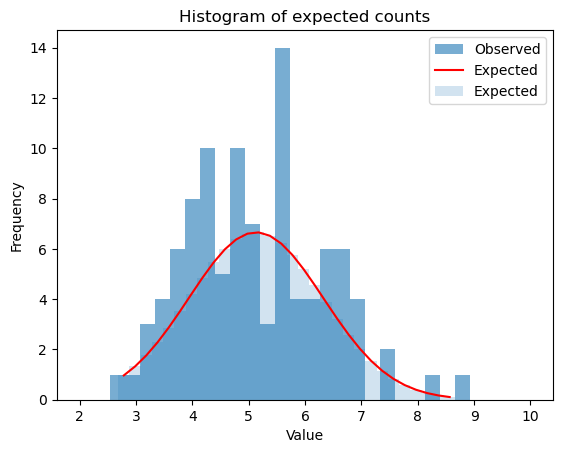

In [2]:
# This looks like the proper approach to me.
%reset -f
from math import pi
import numpy as np
from matplotlib import pyplot as plt  # general plotting 
from scipy.stats import norm, chi2

data1 = np.genfromtxt("../HW2_data/data1.dat")
data2 = np.genfromtxt("../HW2_data/data2.dat")
data3 = np.genfromtxt("../HW2_data/data3.dat")

data = data2
number_bins = 30

counts_observed, bin_edges = np.histogram(data, bins=number_bins, range=(-2.0, 2.0))
counts_observed, bin_edges = np.histogram(data, bins=number_bins, range=(min(data), max(data)))

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

mean = np.mean(data)
std = np.std(data)

# Calculate the PDF values for the bin centers
pdf_values = norm.pdf(bin_centers, mean, std)

bin_width = bin_edges[1] - bin_edges[0]
counts_expected = pdf_values * bin_width * len(data)    

print("Observed counts:", counts_observed)
print("Expected counts:", counts_expected)

chi_square_statistic = np.sum((counts_observed - counts_expected) ** 2 / counts_expected)
degrees_of_freedom = number_bins - 1

cdf = chi2.cdf(chi_square_statistic, degrees_of_freedom)
pvalue = 1 - cdf

print()
print(f"Chi2-statistic: {chi_square_statistic:.4f}, Cumulative probability: {cdf:.4f}, p-value: {pvalue:.4f}")

# Plot the observed and expected counts
plt.hist(data, bins=number_bins, range=(round(min(data))-1, round(max(data)+1)), alpha=0.6, label='Observed')
plt.bar(bin_centers, counts_expected, width=bin_width, alpha=0.2, label='Expected')
plt.plot(bin_centers, counts_expected, 'r-', label='Expected')
plt.title('Histogram of expected counts')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Falk's preferred answer. 

We consider 20 equally space bins and count the number of occurrences in each bin. We the compute the expected counts for a Gaussiab distribution and calculate the chi_squares statisticc  sum(o_i - e_i)/e_i and using the degree of freedom the cdf from which we get the p-value.

Results using 20 bins:
```
Data1:  Chi2-statistic: 35.3521, Cumulative probability: 0.9873, p-value: 0.0127
Data2   Chi2-statistic: 23.0069, Cumulative probability: 0.7630, p-value: 0.2370
```

For data1 the probability to reject the Null hypothesis (that the distribution is different from a Gaussian distribution) is 12%. We "Fail to Reject"  the Null hypothesis (at a meaningful level which is 95%). 

Results using 30 bins:
```
data1: Chi2-statistic: 44.1366, Cumulative probability: 0.9644, p-value: 0.0356
data2: Chi2-statistic: 48.8042, Cumulative probability: 0.9879, p-value: 0.0121

```
For data2 we can reject the null hypothesis, that is we failed to reject that  it is not Gaussia, i.e. it can well be Gaussian.